In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('/content/boston.csv')

In [ ]:
#rowsand columns
df.shape

(506, 14)

In [ ]:
#check for missig values
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [ ]:
#statistical measures of the df
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
#understanding the correlation
correlation = df.corr()

<Axes: >

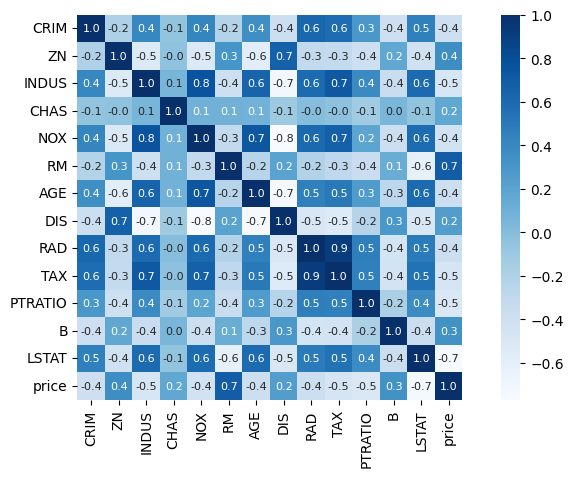

In [ ]:
#creating a heatmap for the correlation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.heatmap(correlation, annot=True, fmt = '.1f', square = True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
#splitting the data and labels
X = df.drop(['price'], axis=1)
Y = df['price']
print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [ ]:
#splitting the data into training and testing data
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=2)

In [ ]:
#model training
from xgboost import XGBRegressor

In [ ]:
#loading the model
model = XGBRegressor()

In [ ]:
#training the model with training data
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
#evalution on training data
from sklearn import metrics
training_data_prediction = model.predict(X_train)

In [ ]:
#R squared mean
score_1 = metrics.r2_score(Y_train, training_data_prediction)
print('R sqaured error:', score_1)
#mean absolute error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)
print('Mean absolute error:', score_2)

R sqaured error: 0.9999980039471451
Mean absolute error: 0.0091330346494618


In [ ]:
#evaluation on test data
test_data_prediction = model.predict(X_test)

In [ ]:
#Rsquared error
score_3 = metrics.r2_score(Y_test,test_data_prediction)
print('R sqaured error:', score_3)
#mean absolute error
score_4 = metrics.mean_absolute_error(Y_test, test_data_prediction)
print('Mean absolute error:', score_4)

R sqaured error: 0.9051721149855378
Mean absolute error: 2.0748727686264927
